In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xs = np.array(range(1,11)) # voltage
ys = np.array([3,5,7,9,11,13,15,17,19.5,21.5]) # length

assert(len(xs) == len(ys))

In [3]:
x_sigma = 0.05

In [4]:
result = np.array([y / x for (x, y) in zip(xs, ys)])

In [5]:
mean_y = sum(ys) / len(ys)
mean_x = sum(xs) / len(xs)
mean_xy = sum(x*y for (x, y) in zip(xs, ys)) / min(len(xs), len(ys))
mean_x_squared = sum(xs**2) / len(xs)

k = (mean_xy - mean_x * mean_y) / (mean_x_squared - mean_x**2)
c = mean_y - k * mean_x;

regression = lambda x: k * x + c
approximation_xs = np.linspace(min(xs) - 1, max(xs) + 1)
approximation_ys =  regression(approximation_xs)

y_sigma = ((sum((regression(xs) - ys)**2) / len(approximation_ys))**2 + 0.5**2)**0.5

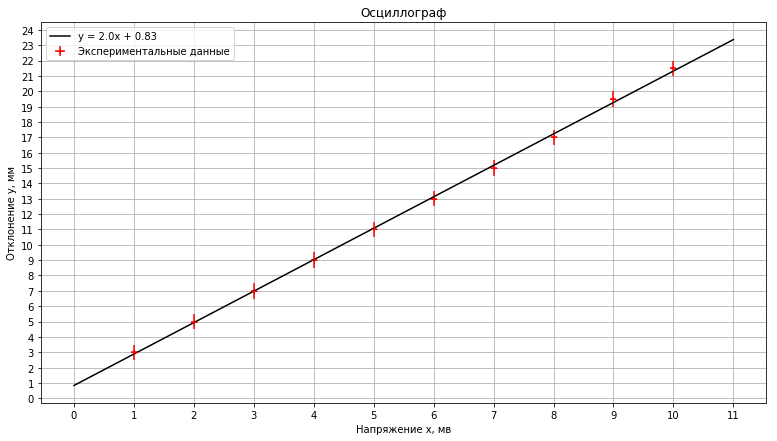

In [6]:
plt.gcf().set_size_inches(13, 7)
axes = plt.axes()
axes.tick_params(axis='x', which='minor', bottom=True)
axes.set_title("Осциллограф")
axes.set_xlabel("Напряжение x, мв")
axes.set_ylabel("Отклонение y, мм")
plt.locator_params(nbins=20, axis='x')
plt.locator_params(nbins=40, axis='y')
plt.grid(True)
plt.plot(approximation_xs, approximation_ys, 'k-')
plt.errorbar(xs, ys, y_sigma, x_sigma, fmt='r+')
plt.legend(["y = {k:.2}x + {c:.2}".format(k=k, c=c), "Экспериментальные данные"]);